# Для своего домашнего задания я выбрал распределение Парето, которое присутствует в scipy.stats.

### Комментарии из scipy reference.

The probability density function for pareto is:
pareto.pdf(x, b) = b / x ** (b+1)
for x >= 1, b > 0.

pareto takes b as a shape parameter.

The probability density above is defined in the “standardized” form. To shift and/or scale the distribution use the
loc and scale parameters. Specifically, pareto.pdf(x, b, loc, scale) is identically equivalent to
pareto.pdf(y, b) / scale with y = (x - loc) / scale.

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from math import sqrt
%matplotlib inline

### Генерация выборки объёма 1000

In [2]:
# по закону двойного распределения Вейбулла зададим случайную величину 

#параметры распределения
k = 4.0
xm = 3.0

#frozen distribution
distribution = sts.pareto(k, loc=0, scale=xm)

# сгенерируем 1000 значений
distributionEx = distribution.rvs(1000)

#проверка задания распределения
print('Theoretical mean: ', distribution.mean())
print('Theoretical standard deviation: ', distribution.std())

Theoretical mean:  4.0
Theoretical standard deviation:  1.4142135623730951


### Построение гистограммы выборки и графика теоритеческой плотности распределения случайной величины

C:\Users\Lestail\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0, 0.5, '$f(x)$')

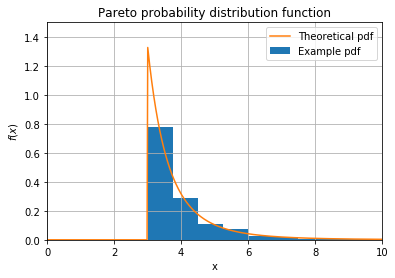

In [3]:
#гистограмма выборки
plt.hist(distributionEx, bins=30, normed=True, label='Example pdf')

#теоретическая плотность распределения
x = np.linspace(0,20,1000)
pdf = distribution.pdf(x)
plt.plot(x, pdf, label='Theoretical pdf')
plt.legend()
plt.grid()
plt.axis([0, 10, 0, 1.5])
plt.title('Pareto probability distribution function')
plt.xlabel('x')
plt.ylabel('$f(x)$')

### Генерация 1000 выборой объёма n (5, 10, 50) и построение гистограммы распределений их выборочных средних.

In [4]:
#кол-во выборок
exampleNum = 1000

#массив объёма выборок
exampleVolume = [5, 10, 50]

#массив под выборочное среднее значение, заполненный нулями
distributionExs = np.zeros( (len(exampleVolume), exampleNum) )

#вычисление выборочных средних значений и занесение в массив
for i in range( len(exampleVolume) ):
    for j in range(exampleNum):
        distributionTemp = np.array( sts.pareto.rvs(k, loc=0, scale=xm, size=exampleVolume[i]) )
        distributionTempMean = distributionTemp.mean()
        distributionExs[i, j] = distributionTempMean
        
print (distributionExs)        

[[3.86538654 3.85298939 3.47327589 ... 4.13700521 4.53024965 4.22971604]
 [3.62115218 5.28280124 4.20556064 ... 4.01477675 3.61138632 4.34268397]
 [4.06559172 3.76469286 4.05246326 ... 3.7686911  3.96195891 4.04915144]]


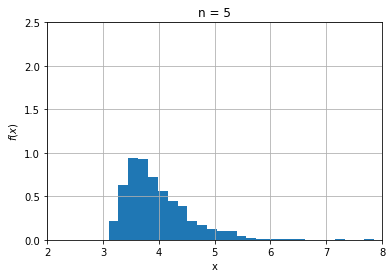

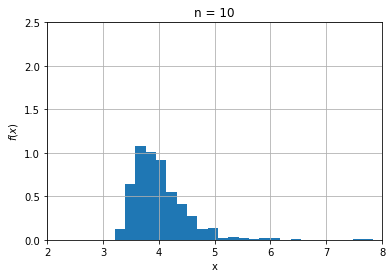

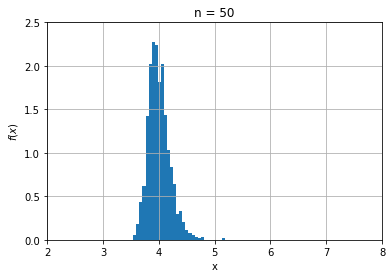

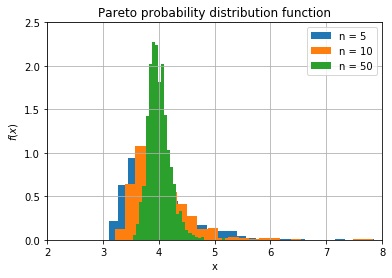

In [5]:
#гистограммы выборки
for i in range( len(exampleVolume) ):
    plt.hist(distributionExs[i], bins=30, normed=True)
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('n = ' + str(exampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('$f(x)$')
    plt.show()
    
for i in range( len(exampleVolume) ):
    plt.hist(distributionExs[i], bins=30, normed=True, label='n = ' + str(exampleVolume[i]))
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('$f(x)$')

### Вычисление параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних

In [6]:
#Матожидание и дисперсия

distributionMean = k * xm / (k - 1)
distributionVariance = np.zeros( len(exampleVolume) )
for i in range( len(exampleVolume) ):
    distributionVariance[i] = xm**2 * k / ( (k - 1)**2 * (k - 2) ) / exampleVolume[i]
    
print ('Матожидание: ' + str(distributionMean))
for i in range( len(exampleVolume) ):
    print ('Дисперсия для n = ' + str(exampleVolume[i]) + ': ' + str(distributionVariance[i]))

Матожидание: 4.0
Дисперсия для n = 5: 0.4
Дисперсия для n = 10: 0.2
Дисперсия для n = 50: 0.04


### Нарисовать плотность соответствующего нормального распределения поверх каждой гистограммы

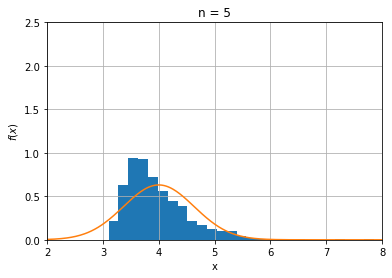

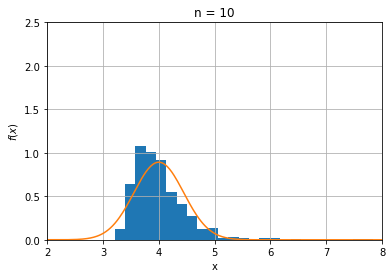

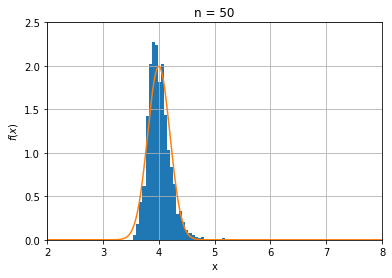

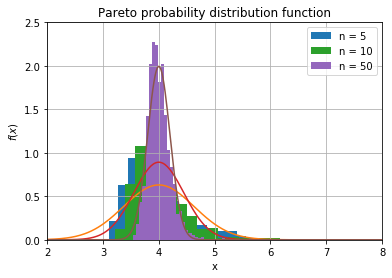

In [7]:
#гистограммы выборки
for i in range( len(exampleVolume) ):
    plt.hist(distributionExs[i], bins=30, normed=True)
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('n = ' + str(exampleVolume[i]))
    plt.xlabel('x')
    plt.ylabel('$f(x)$')
    
    # зададим нормально распределенную случайную величину
    mu = distributionMean
    sigma = sqrt(distributionVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)
    plt.show()
    
for i in range( len(exampleVolume) ):
    plt.hist(distributionExs[i], bins=30, normed=True, label='n = ' + str(exampleVolume[i]))
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    plt.title('Pareto probability distribution function')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('$f(x)$')
    
    # зададим нормально распределенную случайную величину
    mu = distributionMean
    sigma = sqrt(distributionVariance[i])
    normRv = sts.norm(loc=mu, scale=sigma)    
    x = np.linspace(-10,10,1000)
    pdf = normRv.pdf(x)
    plt.plot(x, pdf)

## Выводы по результатам задания

Распределение выборочных средних достаточно хорошо описывается нормальным распределением, что является утверждением центральной предельной теоремы. С ростом n точность нормальной аппроксимации увеличивается.